**Here,In this notebook i had predicted if a person will default the loan or not by using three independent features.And i am not applied any oversampling or undersampling technique, It will applied in the updated version of the notebook.

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras import models,layers

In [2]:
data=pd.read_csv('../input/loan-default-prediction/Default_Fin.csv')
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [3]:
data.shape

(10000, 5)

In [4]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [5]:
data=data.drop(columns='Index',axis=1)
data.head(1)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0


In [6]:
data.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

# Plotting some graphs

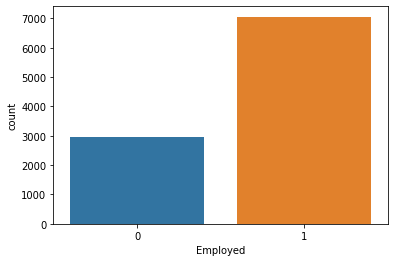

In [7]:
import warnings
warnings.filterwarnings('ignore') #Importing this to ignore warnings
sns.countplot(data.Employed)
plt.show()

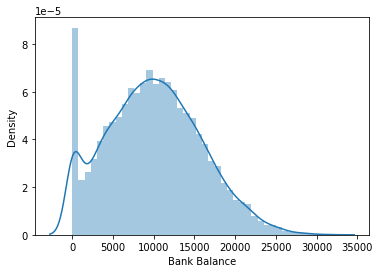

In [8]:
sns.distplot(data['Bank Balance'])
plt.show()

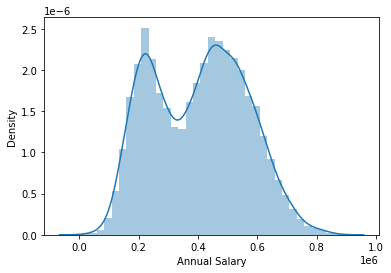

In [9]:
sns.distplot(data['Annual Salary'])
plt.show()

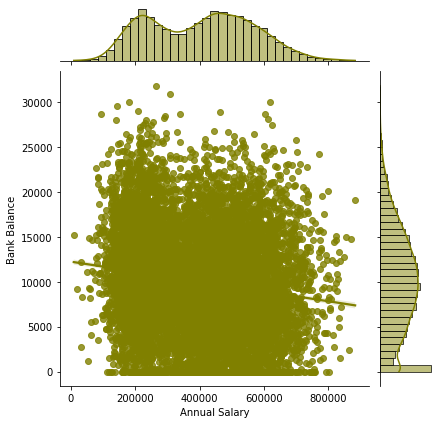

In [10]:
sns.jointplot(x='Annual Salary',y='Bank Balance',data=data,kind='reg',color='olive')
plt.show()

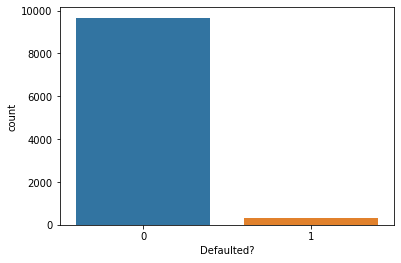

In [11]:
sns.countplot(data['Defaulted?'])
plt.show()

# Splitting the data into independent and dependent variables

In [12]:
x=data.drop(columns='Defaulted?',axis=1)
y=data['Defaulted?']

# Now, Splitting x and y by using train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7000, 3) (3000, 3) (7000,) (3000,)


In [15]:
x_train.head()

,Employed,Bank Balance,Annual Salary
42,1,13819.56,515009.64
183,1,9496.32,555830.88
2961,0,10733.64,168426.00
214,1,14830.56,430065.36
5802,0,15124.08,140360.16


# Scaling the data

In [16]:
mmc=MinMaxScaler()
x_train=mmc.fit_transform(x_train)
x_test=mmc.transform(x_test)

# Applying the model

In [17]:
rfg=RandomForestClassifier()
rfg.fit(x_train,y_train)
y_pred1=rfg.predict(x_test)

# Calulating the accuracy

In [30]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred1)

0.965

In [19]:
xgb=XGBClassifier(n_estimators=150,learning_rate=0.001)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
y_pred2=xgb.predict(x_test)
accuracy_score(y_test,y_pred2)

0.9686666666666667

# Applying neural network

In [22]:
nn=models.Sequential([
    layers.Dense(10,activation='relu',input_shape=(3,)),
    layers.Dense(7,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
    
])
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn.fit(x_train,y_train,epochs=38)

Epoch 1/38
219/219 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.9647
Epoch 2/38
219/219 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9677
Epoch 3/38
219/219 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9677
Epoch 4/38
219/219 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9677
Epoch 5/38
219/219 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9677
Epoch 6/38
219/219 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9677
Epoch 7/38
219/219 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9679
Epoch 8/38
219/219 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9684
Epoch 9/38
219/219 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9687
Epoch 10/38
219/219 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9693

In [24]:
y_pred3=nn.predict(x_test)

In [25]:
y_pred3[:5]

array([[0.00500295],
       [0.00836983],
       [0.04820618],
       [0.02414629],
       [0.01514491]], dtype=float32)

In [26]:
y_pred3=(y_pred3>0.5)
y_pred3[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [27]:
y_pred3=y_pred3.reshape(-1,)
y_pred3[:5]

array([False, False, False, False, False])

In [28]:
y_pred3=y_pred3.astype(int)
y_pred3[:5]

array([0, 0, 0, 0, 0])

In [29]:
accuracy_score(y_test,y_pred3)

0.972

Thank you.
If you like please upvote the notebook.****